In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

Using TensorFlow backend.


In [2]:
# Load the Xception model
# 
model = Xception(
    include_top=True, 
    weights='imagenet')

In [3]:
# Default Image Size for Xception
image_size = (299, 299)

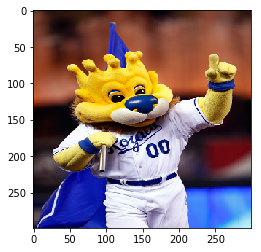

In [4]:
image_path = os.path.join("Images", "Slugger1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n09835506', 'ballplayer', 0.16285643), ('n02799071', 'baseball', 0.084360994), ('n04456115', 'torch', 0.019916769)]


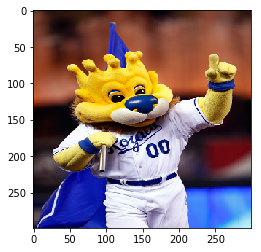

In [6]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [7]:
# Refactor above steps into reusable function
def predict(image_path):
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n09332890', 'lakeside', 0.082410119), ('n02825657', 'bell_cote', 0.072098419), ('n04149813', 'scoreboard', 0.048546564)]


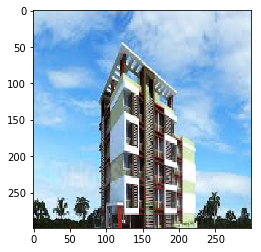

In [12]:
# Try the kitten:

image_path = os.path.join("Images", "apartment.jpeg")
predict(image_path)